In [2]:
import pandas as pd  #used for data label
import numpy as np  #used for maths
import seaborn as sns #used for charts
import matplotlib.pyplot as plt #used for plots


In [5]:
df=sns.load_dataset('titanic') #loading the dataset from seaborn
display(df.head()) #displaying the first 5 rows
df.info() #seeing whether the columns have null values

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
print(df.isnull().sum()) # tells how many cells in each column have null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [8]:
df['age']=df['age'].fillna(df['age'].median()) #numeric values like age are replaced with median
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0]) #cattegory values are filled with mode
df.drop(columns=['deck'],inplace=True)# too many missing values then delete the column
print(df.isnull().sum());

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


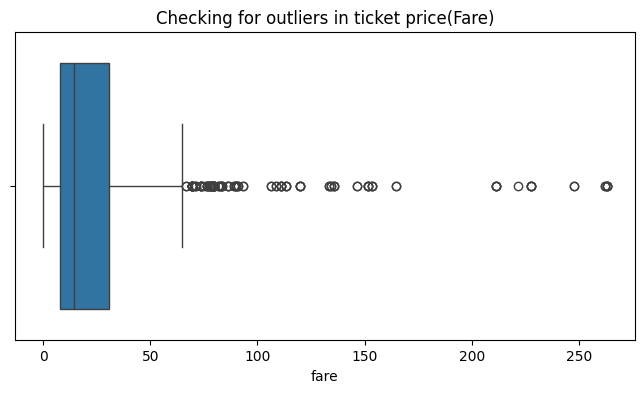

In [12]:
#Outliers are extreme values that don't fit the pattern (like a passenger who paid $500 when everyone else paid $10). These can confuse the model.
plt.figure(figsize=(8,4))
sns.boxplot(x=df['fare'])
plt.title("Checking for outliers in ticket price(Fare)")
plt.show()

df=df[df['fare']<300]
#The chart shows us "dots" that are far away from the main box.
#Those are the outliers.
#We told the computer: "If the ticket price is over 300, remove that passenger from our list."

In [13]:
# Method 1: Label Encoding for Sex (binary)
# Convert 'male' to 0 and 'female' to 1
df['sex']=df['sex'].map({'male':0,'female':1})
# Method 2: One-Hot Encoding for Embarked (Location)
# This turns the 'embarked' column into 3 separate columns of 0s and 1s
df=pd.get_dummies(df,columns=['embarked'],drop_first=True)
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,False,True
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,False,False
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,False,True
3,1,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,False,True
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,False,True


In [14]:
from sklearn.preprocessing import StandardScaler
# Select only the numerical columns we want to scale
scaler=StandardScaler()
df[['age','fare']]=scaler.fit_transform(df[['age','fare']])
display(df[['age', 'fare']].head())

,age,fare
0,-0.563437,-0.566959
1,0.664528,0.989016
2,-0.256446,-0.550557
3,0.434285,0.547171
4,0.434285,-0.547519
